In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,pc
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


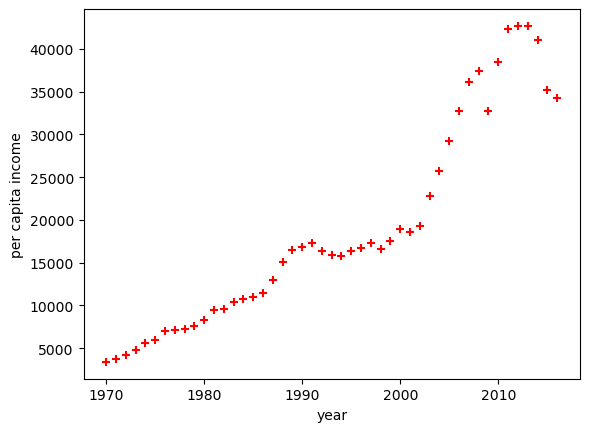

In [7]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income')
plt.scatter(df.year,df.pc,color='red',marker='+')

In [8]:
new_df = df.drop('pc',axis='columns')
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [10]:
pc = df.pc
pc.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: pc, dtype: float64

In [11]:
reg = linear_model.LinearRegression()
reg.fit(new_df,pc)

LinearRegression()

In [12]:
reg.predict([[2020]])

C:\Users\krish\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

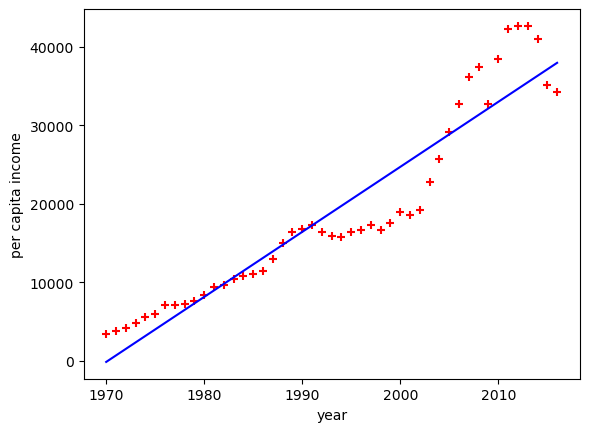

In [14]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income')
plt.scatter(df.year,df.pc,color='red',marker='+')
plt.plot(df.year,reg.predict(df[['year']]),color='blue')

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [43]:
x = np.array(df['year'])
poly_features = poly.fit_transform(x.reshape(-1, 1))

In [52]:
y = np.array(df['pc'])
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [45]:
y_predicted = poly_reg_model.predict(poly_features)

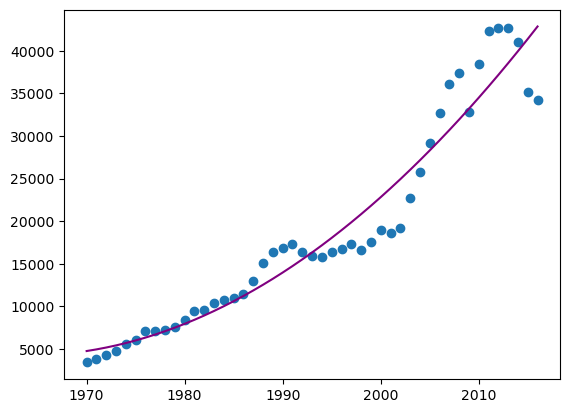

In [46]:
plt.scatter(x, y)
plt.plot(x, y_predicted, color='purple')

In [54]:
inparr = np.array([[2020]])
poly_reg_model.predict(poly.fit_transform(inparr))

array([48993.84957627])